In [95]:
import numpy as np
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

import json
import os
import shutil

In [105]:
keypoints_dict = dict()
copy_path = '../data/test'
data_dir = '../data/manual_test'
for filename in os.listdir(data_dir):
    if filename.endswith('.json'):
        # Извлекаем номер картинки, номер человека и руку из имени файла
        if filename.startswith('0'):
            img_name = filename.split('_')[0]
        elif filename.startswith('Berry'):
            img_name = "berry" + filename.split('_')[3]
        else:
            img_name = "ex" + filename.split('_')[2]

        src = os.path.join(data_dir, filename)
        # Загружаем Keypoint из файла
        keypoints = np.array(json.load(open(src))['hand_pts'])[:, :2]

        if img_name not in keypoints_dict:
            keypoints_dict[img_name] = keypoints
            dst = os.path.join(data_dir, img_name + '.jpg')
            final_dst = os.path.join(copy_path, img_name + '.jpg')
            os.rename(src, dst)
            shutil.copy(dst, final_dst)
        else:
            keypoints_dict[img_name] = np.vstack((keypoints_dict[img_name], keypoints))


In [106]:
keypoints_dict

{'berry000043': array([[463.        , 217.        ],
        [461.81784058, 199.94168091],
        [459.59832764, 188.8915863 ],
        [455.52926636, 177.10482788],
        [455.89916992, 169.73809814],
        [445.91140747, 176.36816406],
        [434.44396973, 163.10804749],
        [425.565979  , 151.68962097],
        [419.27737427, 141.37620544],
        [441.84231567, 177.84150696],
        [427.78546143, 162.0030365 ],
        [419.64727783, 150.95295715],
        [412.98876953, 139.16619873],
        [437.77322388, 181.89320374],
        [421.12695312, 162.37138367],
        [413.35870361, 150.95295715],
        [407.44003296, 141.00787354],
        [430.37487793, 185.20823669],
        [421.12695312, 174.15814209],
        [413.72860718, 163.84472656],
        [408.91970825, 155.37298584],
        [256.        , 209.        ],
        [256.28268433, 192.72567749],
        [255.5243988 , 182.15631104],
        [261.2114563 , 168.18963623],
        [258.        , 158.        

In [110]:
keypoints_dict['berry000081']

array([[402.41864014, 422.97845459],
       [384.93658447, 415.4664917 ],
       [349.97241211, 418.5395813 ],
       [334.54702759, 437.66088867],
       [336.26098633, 453.70913696],
       [354.42861938, 422.29553223],
       [336.26098633, 438.6852417 ],
       [345.85897827, 445.17285156],
       [352.37191772, 442.09976196],
       [359.91320801, 429.46603394],
       [344.48782349, 446.88009644],
       [355.79977417, 447.56298828],
       [360.94155884, 443.12411499],
       [367.11169434, 435.27072144],
       [351.00076294, 455.75784302],
       [361.62713623, 454.39202881],
       [367.79727173, 449.61172485],
       [375.68133545, 440.39251709],
       [363.34106445, 459.85528564],
       [370.88235474, 454.39202881],
       [374.65298462, 450.97750854]])

In [103]:
keypoints_dict = {k: v.tolist() for k, v in keypoints_dict.items()}

# Save keypoints_dict to JSON file
with open('test_keypoints.json', 'w') as f:
    json.dump(keypoints_dict, f)

In [70]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

# Загрузка модели
model = mp_hands.Hands(static_image_mode=True, max_num_hands=4, min_detection_confidence=0.5)

# Генерация предсказаний для одного изображения
with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
    num_people = int(el.split("_")[1])

    image = cv2.imread("../data/manual_train/001401452_01_l.jpg")
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Обработка результатов
    if results.multi_hand_landmarks:
        # Получить координаты ключевых точек
        keypoints = []
        for hand_landmarks in results.multi_hand_landmarks:
            for landmark in hand_landmarks.landmark:
                keypoints.append(landmark.x)
                keypoints.append(landmark.y)
        keypoints = np.array(keypoints)
        keypoints = keypoints.reshape(-1, 2)

        # Преобразование координат ключевых точек в пиксели исходного изображения
        height, width, _ = image.shape
        keypoints[:, 0] = keypoints[:, 0] * width
        keypoints[:, 1] = keypoints[:, 1] * height
        keypoints = np.round(keypoints).astype(int)


In [71]:
for i in keypoints:
    print(i)

[1415  778]
[1403  786]
[1383  798]
[1362  803]
[1344  809]
[1365  826]
[1336  819]
[1326  803]
[1321  788]
[1357  816]
[1333  806]
[1325  789]
[1323  773]
[1353  803]
[1334  792]
[1329  776]
[1330  761]
[1353  791]
[1340  783]
[1339  771]
[1342  759]


In [72]:
left_hand_keypoints, right_hand_keypoints = [], []
if keypoints[0][0] < keypoints[21][0]:  # Проверяем, какая рука находится выше
    left_hand_keypoints.extend(keypoints[:21])
    right_hand_keypoints.extend(keypoints[21:])
else:
    left_hand_keypoints.extend(keypoints[21:])
    right_hand_keypoints.extend(keypoints[:21])


IndexError: index 21 is out of bounds for axis 0 with size 21

In [73]:
# image = cv2.imread("../data/manual_train/001401452_01_l.jpg")
for keyp in keypoints:
    cv2.circle(image, (keyp[0], keyp[1]), 0, (255, 0, 0), 15)

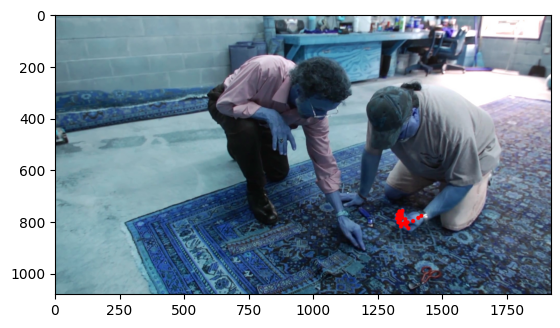

In [74]:
plt.imshow(image)

In [92]:
'001401452_01_l.json'.split('.')[0].split('_')

['001401452', '01', 'l']

In [87]:
np.array(json.load(open('../data/manual_train/001401452_01_l.json'))['hand_pts'])[:, :2]


np.vstack((np.array(json.load(open('../data//manual_train/001401452_01_l.json'))['hand_pts'])[:, :2], np.array(json.load(open('../data//manual_train/001401452_01_l.json'))['hand_pts'])[:, :2]))

array([[1111.        ,  783.        ],
       [1124.29394531,  822.91973877],
       [1132.16943359,  855.52545166],
       [1149.99304199,  873.68560791],
       [1166.57312012,  895.56036377],
       [1164.91516113,  829.11065674],
       [1181.08081055,  870.38378906],
       [1189.37084961,  890.19488525],
       [1196.4173584 ,  910.8314209 ],
       [1176.93579102,  824.9833374 ],
       [1186.05480957,  869.14556885],
       [1193.51586914,  894.32220459],
       [1197.66088867,  910.41870117],
       [1173.2052002 ,  824.15789795],
       [1182.73876953,  869.97106934],
       [1189.37084961,  892.67126465],
       [1193.51586914,  907.52960205],
       [1169.88916016,  834.88891602],
       [1178.59375   ,  865.43103027],
       [1183.56774902,  882.76568604],
       [1188.54174805,  896.79858398],
       [1111.        ,  783.        ],
       [1124.29394531,  822.91973877],
       [1132.16943359,  855.52545166],
       [1149.99304199,  873.68560791],
       [1166.57312012,  8

In [ ]:
image = cv2.imread("../data/manual_train/000015774_01_r.jpg")